<a href="https://colab.research.google.com/github/holezekki99/JODA2022/blob/vko1_muutokset/JODA2022_workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JODA2022
## Juha Holstila



---
### Keskeiset oppimistavoitteet
Tavoitteet keväälle:

1. Omaksu datatieteen peruskäsitteet (määritelmiä, historiaa, pohdintaa nykytilasta ja tulevaisuudesta, ym.)
2. Opi pystyttämään ja työskentelemään nykyään yleisesti käytössä olevilla työkaluilla (github, jupyter ym.).
3. Opi ja laajenna ymmärrystä saatavilla olevista datasäilöistä (avoin data ym.)
4. Paranna teoreettista ja käytännön osaamista datan muokkauksessa Pythonilla.
5. Selvitä mitä eri tilastollisia menetelmiä on käytettävissä datan analysoinnissa.
6. Opi ja laajenna ymmärrystä datan visualisoinnin työkaluista ja parhaista käytänteistä.





### Lähtötilanne
Olen viimeiset pari vuotta harrastuksena ja oman työni ohella tehnyt lentoliikenteen parissa jonkin sortin datatiedettä. Lentoliikenne on siitä hyvä ala tähän, että kaikki toimijat, ml. lentoyhtiöt, lennonvarmistuspalvelun tarjoajat ja ilmatieteenlaitokset toimittavat kaiken relevantin tietonsa keskitettyyn paikkaan Eurocontrolliin. Alan toimijoille on kehitetty tehokas rajapinta tähän dataan.
Aluksi tarkoitus oli kerätä meitä kiinnostava data omalle alustalle jatkoa varten. Tarkoituksena on ensinnäkin muuttaa toimintamme nolliksi ja ykkösiksi, eräänlaiseksi digitaaliseksi kaksoseksi. Tämä antaa meille mahdollisuuden oikeasti ymmärtää mitä operatiivisessa ympäristössämme oikeasti tapahtuu.
Datan hakemista, käsittelyä ja visualisointia tein aluksi excelillä joka vaatii paljon käsityötä. Viimeisen vuoden aikana olen alkanut muokkaamaan dataa pythonilla. Visualisointiin on toistaiseksi valikoitunut Power BI. 

---
### Viikko 1


#### Viikon 1 tapahtumat

Opinnot alkoivat. Osallistuin 9.3. aloitusluennolle ja 11.3. demo-session katsoin nauhoituksena viikonloppuna.

Kurssin sisältö esiteltiin riittävän kattavasti luennolla.

#### Viikon 1 tavoitteet
Tavoitteena oli saada ympäristö luotua. 

#### Viikon 1 koodaus - kehitys ja julkaisuympäristön pystyttäminen
##### **Julkaisuympäristö**
En ole ennen käyttänyt githubia, joten ensimmäinen tavoite oli saada se luotua.
Jupyterista minulla oli vain vähän aikaisempaa käyttökokemusta. En halunnut ensin asentaa Jupyteria koneelle vaan tutkiskelin mahdollisuuksia online versioihin. Löysin Googlen CoLabin, johon sain työkirjan tehtyä ja linkattua sen uusille Githubin sivuilleni. Onko tämä toimiva ratkaisu, selviää varmasti myöhemmin.

##### **Kehitysympäristö**
Harjoitustyötä varten pystytin omalle koneelle Anacondan. Aikomuksenani on käyttää Traffic-kirjastoa, jonka
XXX jatka

##### **Viikko 1 koodaus**
Tämän viikon koodauksen tarkoitus on hakea joku datasetti ja käytännössä pandan metodeilla tarkkailla sitä.

Haeskelin avoindata.fi sivusta moottoripyöräaiheisia datasettejä ja vastaan tuli lista Helsingin kaupungin alueella tapahtuneista liikenneonnettomuuksista. 

Haetaan tiedosto ja aletaan tutkia mitä pitää sisällään:

In [1]:
import pandas as pd

DATAFILE = "https://www.hel.fi/hel2/tietokeskus/data/helsinki/ksv/liikenneonnettomuudet_Helsingissa.csv"
df = pd.read_csv(DATAFILE, sep=';')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50724 entries, 0 to 50723
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LAJI       50724 non-null  object 
 1   pohj_etrs  50724 non-null  float64
 2   ita_etrs   50724 non-null  float64
 3   VAKAV_A    50724 non-null  int64  
 4   VV         50724 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1.9+ MB


In [3]:
df.head()

,LAJI,pohj_etrs,ita_etrs,VAKAV_A,VV
0,MA,6679525.638,2.550357e+07,1,2010
1,MA,6681957.849,2.550356e+07,2,2010
2,MA,6684750.304,2.550004e+07,1,2010
3,MA,6674428.942,2.549505e+07,1,2010
4,MA,6674447.788,2.550076e+07,1,2010


Muuttujat

Alla oleva tieto oli annettuna:

vakav_a = vakavuusaste, (1 = omaisuusvahinko, 2 = loukkaantumiseen johtanut, 3 = kuolemaan johtanut)
POHJ_ETRS = Pohjoiskoordinaatti ETRS-GK25-järjestelmässä
ITA_ETRS = Itäkoordinaatti ETRS-GK25-järjestelmässä
vv = vuosi
laji = onnettomuuslaji heikoimman osallisen mukaan, (jk = jalankulkijaonnettomuus, pp = polkupyöräonnettomuus, mp = mopo/moottoripyöräonnettomuus, ma = moottoriajoneuvo-onnettomuus)

Monta onnettomuutta per onnettomuuslaji:

In [4]:
df['LAJI'].unique()

array(['MA', 'JK', 'PP', 'MP'], dtype=object)

In [5]:
df['LAJI'].value_counts()

MA    42435
PP     3291
JK     2970
MP     2028
Name: LAJI, dtype: int64

Tehdään kuvaaja josta näkee eri vuosina moottoripyörä onnettomuuksien kehittymisen:

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


Otetaan datasta vain moottoripyöräonnettomuudet:

In [7]:
df_mp = df[df['LAJI'] == 'MP']
df_mp.head()

,LAJI,pohj_etrs,ita_etrs,VAKAV_A,VV
535,MP,6680351.668,2.549378e+07,1,2010
624,MP,6671513.485,2.549636e+07,2,2010
626,MP,6674590.598,2.550260e+07,2,2010
651,MP,6673763.117,2.549573e+07,1,2010
679,MP,6685107.509,2.550159e+07,2,2010


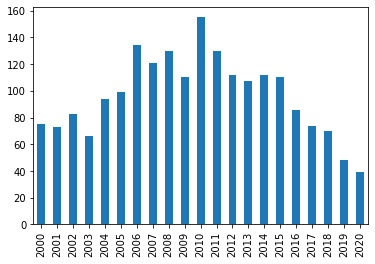

In [8]:
df_mp['VV'].value_counts().sort_index().plot.bar()
#plt.show()

Koitetaan saada MP-onnettomuuksia kartalle.

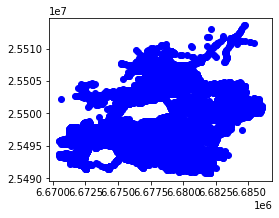

In [9]:
figure(figsize=(4, 3))
plt.scatter(df['pohj_etrs'], df['ita_etrs'], c ="blue")

In [62]:

#us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")
mp_onnettomuus_loc = df_mp[['pohj_etrs', 'ita_etrs']]
mp_onnettomuus_loc = mp_onnettomuus_loc.rename(columns={"pohj_etrs":"lat", "ita_etrs":"lon"})
mp_onnettomuus_loc['lat'] = mp_onnettomuus_loc['lat']
mp_onnettomuus_loc['lon'] = mp_onnettomuus_loc['lon'] 
mp_onnettomuus_loc.head()



,lat,lon
535,6680351.668,2.549378e+07
624,6671513.485,2.549636e+07
626,6674590.598,2.550260e+07
651,6673763.117,2.549573e+07
679,6685107.509,2.550159e+07


Määritetään alue missä onnettomuudet tapahtuneet:

In [63]:
from mpl_toolkits.basemap import Basemap
import pyproj

u = mp_onnettomuus_loc

u.head()

,lat,lon
535,6680351.668,2.549378e+07
624,6671513.485,2.549636e+07
626,6674590.598,2.550260e+07
651,6673763.117,2.549573e+07
679,6685107.509,2.550159e+07


Muutetaan koordinaatit WGS84:ksi:

In [64]:

transformer = pyproj.Transformer.from_crs("epsg:3879", "epsg:4326")

lat = u['lat'].values
lon = u['lon'].values

u['lat'], u['lon'] = transformer.transform(lat, lon) 



u.head()

,lat,lon
535,60.235819,24.887813
624,60.156524,24.934439
626,60.184150,25.046860
651,60.176709,24.923128
679,60.278548,25.028736


In [91]:

# determine range to print based on min, max lat and lon of the data
margin = 0.1 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin
lon_0=((lon_min + lon_max))/2

lon_0


25.03448880955593

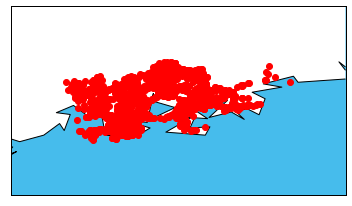

In [93]:

# create map using BASEMAP

m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            resolution = 'i',
            #area_thresh=1000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
#lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lon, lat, marker = 'o', color='r', zorder=5)
plt.show()

In [126]:
BBox = ((mp_onnettomuus_loc.lon.min(), mp_onnettomuus_loc.lon.max(), mp_onnettomuus_loc.lat.min(), mp_onnettomuus_loc.lat.max()))
BBox

(6670498.48, 6686021.8687, 25490798.33220117, 25513020.96)

In [119]:

import plotly.express as px

#fig = px.scatter_mapbox(mp_onnettomuus_loc, lat=61, lon=21, color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig = px.scatter_mapbox(mp_onnettomuus_loc, lat="lat", lon="lon", color_discrete_sequence=["fuchsia"], zoom=3, height=300)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [99]:
import pyproj
pyproj.transform(wgs84, isn2004, 63.983, -19.700)

NameError: ignored

---
#### **Viikko 2**
##### *Viikon 2 tapahtumat*
Katselin keskiviikkoisen luennon ja perjantain koodi-klinikan jälkilähetyksenä.
##### *Viikon 2 yhteenveto*
Viisi keskeiseintä asiaa luennolta:
1. Luennolla pohdittiin mistä kulmasta kannattaa datan hyödyntäminen aloittaa. Alkaako se siitä, että johdolla/operatiivisella puolella on kysymyksiä joihin halutaan vastauksia vai siitä että kerätään dataa ja jälkikäteen opitaan mitä siitä voitaisiin nähdä.
On tärkeää löytää eri roolien tasapaino kun aletaan hyödyntämään dataa. Toisaalta on tärkeää, että kehityspuoli tekee valmistelevia toimia esim. datan keräämiseksi ja luo ympäristön joka mahdollistaa datan käsittelyn, visualisoinnin ja tulosten jakamisen. Toisaalta taas tämä pitää olla operatiivisen puolen ohjauksessa jotta kehittäjät ymmärtävät alusta alkaen mitä datalla aiotaan tehdä.
Tällä hetkellä olen itse sitä mieltä että tarvitaan ihmisiä jotka toimivat tässä välimaastossa, eli ymmärtävät riittävästi datan mahdollisuudet ja käytännön toteutuksia yleisellä tasolla mutta pääosaaminen on operatiivisella puolella. Tämän jälkeen tiimiä voi vahvistaa kehittäjillä jotka osaavat toteuttaa halutut toiminnot.
Käytäntö on osoittanut, että alkuperäinen datan hyödyntäminen laajenee huomattavasti kun dataa on saatu käyttöön. Uusia kysymyksiä ja mittareita joita voidaan datan hyödyntämisellä ratkaista nousee valtavalla tahdilla sitä mukaa kun organisaation ymmärrys kasvaa.
2. Datan profilointi käsite - tutki/lue/ymmärrä
3. Pohdittiin Suomalaisten yritysten maturiteettia datan ja analytiikan osalta. Ilmailussa ja etenkin lennonvarmistuksessa eletään nyt eräänlaista ajattelun muutosharppausta ("paradigm shift"). Viimeisten parin vuoden aikana on ollut häkellyttävää seurata miten ala on noussut poteroistaan ja tekee vahvaa siirtymää kohti nykyaikaa ja on kykenevä omaksumaan muilta aloilta tuttuja tekniikoita ja arkkitehtuureja.
4. Esiteltiin ryömijät ja raapijat. Pohdittiin niiden käyttöä myös eettisyyden ja laillisuuden näkökulmasta.
Itse olen ollut siinä uskossa, että niiden käyttö verkkosivuilta tiedon naaraamiseen ei ole enää juurikaan mahdollista koska sivut tehdään dynaamisesti latausvaiheessa. Tätä täytyy tutkia muutamalla esimerkillä.
5. Esiteltiin datatyyppien tärkeyttä datan käsittelyssä. Tästä minulla onkin jo jonkin verran kokemusta ja voin vain liputtaa tämän puolesta.

##### *Viikon 2 koodaus*
Viikon 2 koodauskokeiluna toteutin raapijan, joka kirjautuu työtuntikirjanpitojärjestelmään ja raapii sieltä tuntimääräni 2 ja 4 viikon kuluttua.
Järjestelmän tehtävänä on pitää kirjaa onko työntekijällä lupa tehdä töitä. Luvan ylläpitoon tulee olla 100 tuntia työskentelyä puolen vuoden aikana. Aina työpisteeseen mennessä työntekijä kirjautuu järjestelmään ja sieltä ulos pouistuessaan työpisteestä. Näin tallentuu työpisteessä vietetty aika ja vaatimus siis 100h / 6kk ylittyy joka hetki.
Järjestelmään siirrettäessä selaimella tulee ensin vastaan kirjautumissivu. Kirjautuminen oli toteutettu formilla ja POST metodilla joka aktivoi javascriptin. Tässä olikin opettelua miten saan kirjautumisen toimimaan. Lukuisten tuntien ja satojen google-hakujen jälkeen onnistuin tekemään python skriptin joka hoiti kirjautumisen ja avasi etusivuni josta piti siis raapia tuntimäärät.
XXTÄHÄN KOODI

---
#### **Viikko 3**
##### *Viikon 3 tapahtumat*
Katselin keskiviikkoisen luennon ja perjantain koodi-klinikan jälkilähetyksenä.
##### *Viikon 3 yhteenveto*
Viisi keskeiseintä asiaa luennolta:
1. Tilastollinen analyysi vs. tilastomatematiikka: analyysi on matematiikan soveltamista
2. Tekoäly vs. koneoppiminen: tekoäly on todella laaja käsite, koneoppiminen on "vain" sitä että datasta tarkkaillaan piirteitä ja pystytään kertomaan miten piirteet vaikuttaa haluttuun muuttujaan. Suurin osa tekoälyn sovelluksista vielä tänään onkin itseasiassa pelkkää koneppimista.
3. Tilastollinen analyysi vs. koneoppiminen: analysoimalla opitaan datasta, koneoppiminen auttaa ennustamaan (prediktiivinen analyysi). Koneoppimista voi myös käyttää lisäämään dataan piirteitä. 

##### *Viikon 3 koodaus*
